In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=42,
                                      cluster_std=(0.9,0.9,0.9))

Text(0, 0.5, 'X2')

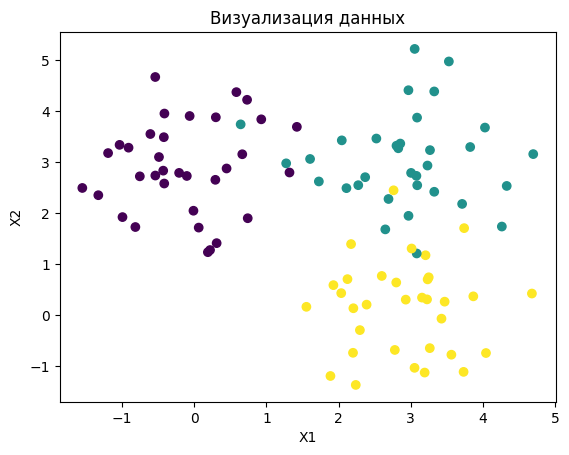

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
depth=5
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=42)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

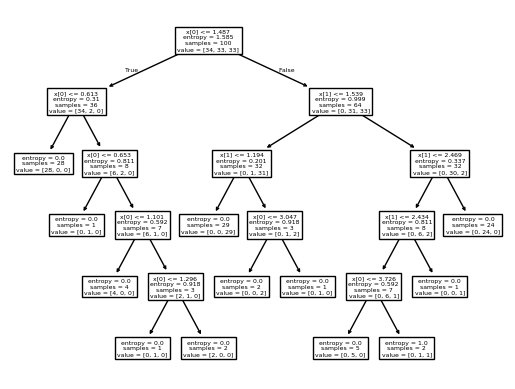

In [7]:
plot_tree(clf_tree) 
plt.show()

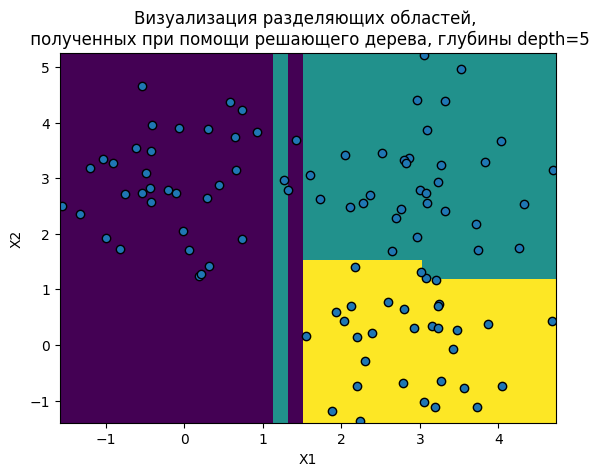

In [8]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [10]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [11]:
observation_new = [[2, 2]]

In [12]:
clf_tree.predict(observation_new)

array([1])

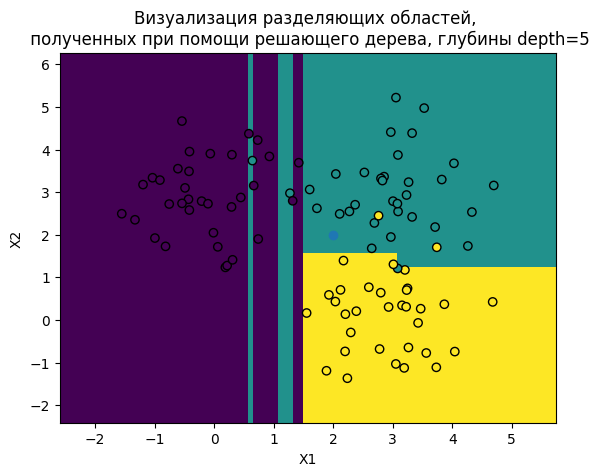

In [13]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1])

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [14]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

In [15]:
X.reshape((-1,1)).shape

(100, 1)

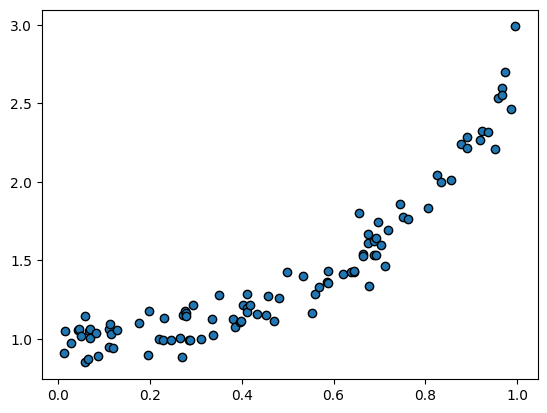

In [16]:
plt.scatter(X, y,  edgecolors='black',linewidth=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=1)
reg_tree.fit(X.reshape((-1,1)), y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [19]:
X_synth = np.linspace(0, 1, 20).reshape((-1,1))
y_pred_reg = reg_tree.predict(X_synth)

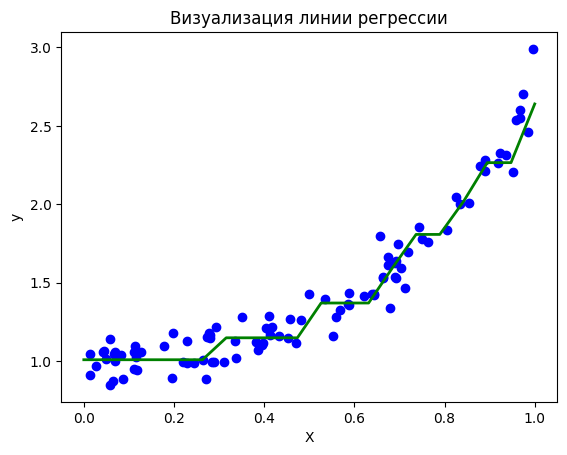

In [20]:
plt.scatter(X, y, c="b")

plt.plot(X_synth, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
y_pred = reg_tree.predict(X.reshape((-1, 1)))

In [23]:
print('r2= ', r2_score(y, y_pred))
print('MSE= ', mean_squared_error(y, y_pred))

r2=  0.9646275092754845
MSE=  0.008358803068309453


In [24]:
observation_new = [[0.7]]

In [25]:
reg_tree.predict(observation_new)

array([1.59454871])

#### Задания для самостоятельного выполнения

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.
1. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.
1. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.
1. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.
1. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.
1. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.
1. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.
1. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.
1. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
1. Загрузите весь датасет fetch\_california\_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [28]:
X, y = iris.data[:, :-2], iris.target
X.shape

(150, 2)

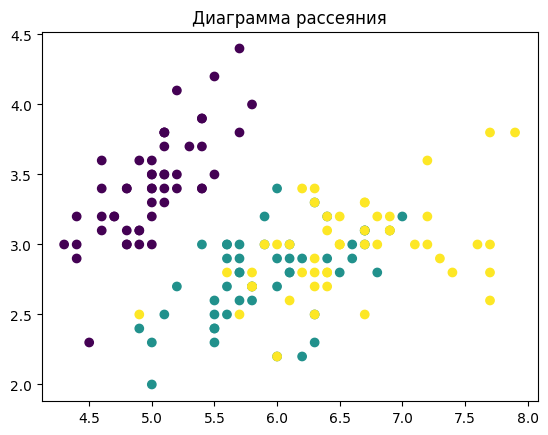

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Диаграмма рассеяния")
plt.show()

2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
clf_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=1)

clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

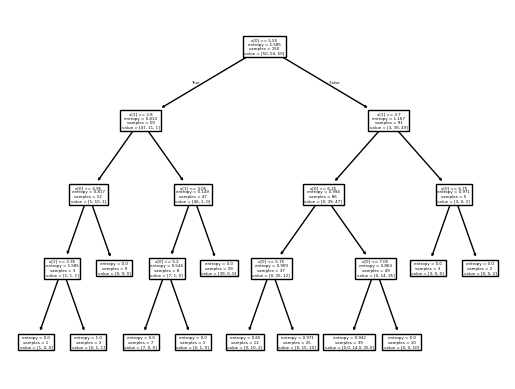

In [32]:
plot_tree(clf_tree)
plt.show()

3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [33]:
def fit_and_show_decision_tree(X, y, max_depth):
    clf_tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=1)
    clf_tree.fit(X, y)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    
    y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)
    
    plt.scatter(X[:, 0], X[:, 1], edgecolors='black',linewidth=1)
    
    plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(max_depth))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

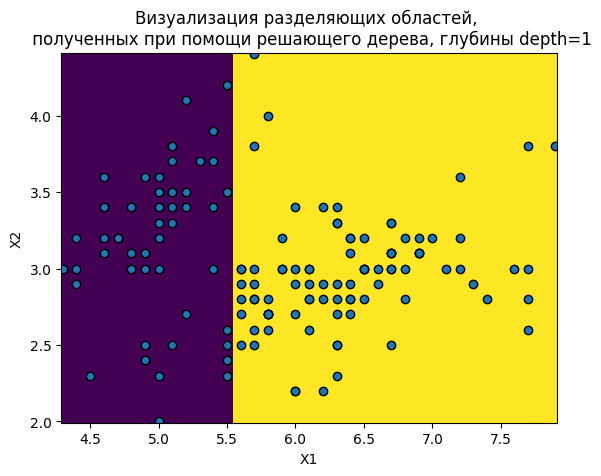

In [34]:
fit_and_show_decision_tree(X, y, 1)

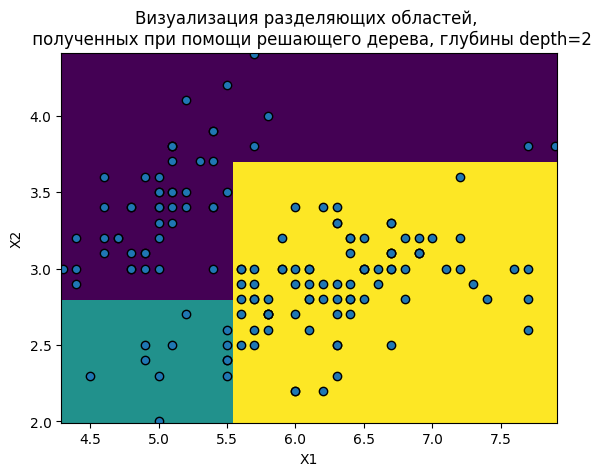

In [35]:
fit_and_show_decision_tree(X, y, 2)

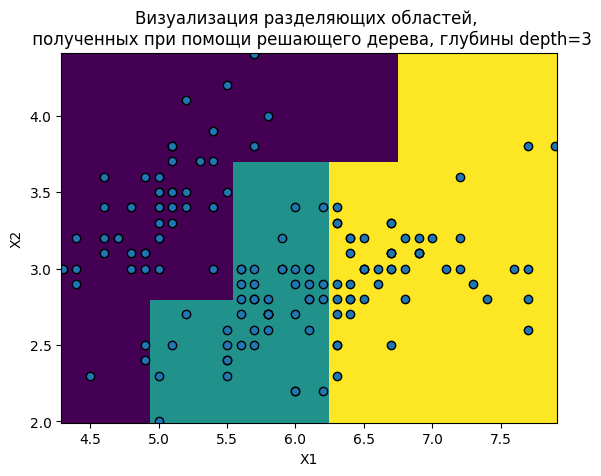

In [36]:
fit_and_show_decision_tree(X, y, 3)

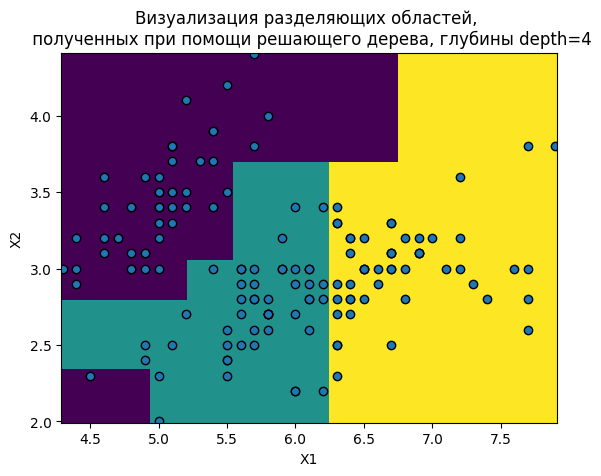

In [37]:
fit_and_show_decision_tree(X, y, 4)

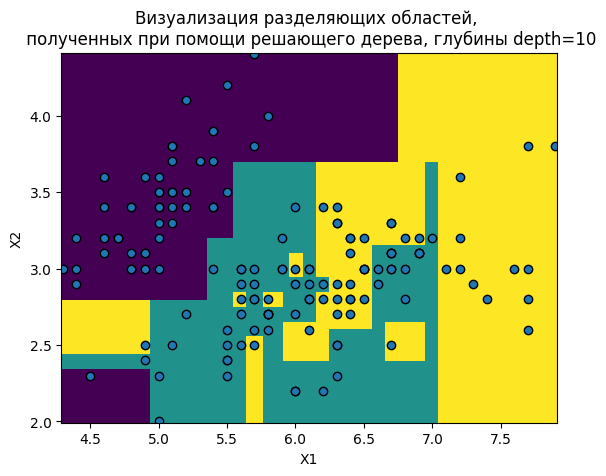

In [38]:
fit_and_show_decision_tree(X, y, 10)

4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [40]:
def print_metrics(X, y, max_depth):
    clf_tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=1)
    clf_tree.fit(X, y)

    y_pred = clf_tree.predict(X)
    print(confusion_matrix(y, y_pred))
    print('Accuracy =', accuracy_score(y, y_pred))
    print('F1_score =', f1_score(y, y_pred, average='micro'))

In [41]:
print_metrics(X, y, 1)

[[47  0  3]
 [11  0 39]
 [ 1  0 49]]
Accuracy = 0.64
F1_score = 0.64


In [42]:
print_metrics(X, y, 2)

[[49  1  0]
 [ 1 10 39]
 [ 2  1 47]]
Accuracy = 0.7066666666666667
F1_score = 0.7066666666666667


In [43]:
print_metrics(X, y, 3)

[[50  0  0]
 [ 2 34 14]
 [ 1 12 37]]
Accuracy = 0.8066666666666666
F1_score = 0.8066666666666666


In [44]:
print_metrics(X, y, 4)

[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]
Accuracy = 0.82
F1_score = 0.82


In [45]:
print_metrics(X, y, 10)

[[50  0  0]
 [ 0 46  4]
 [ 0 11 39]]
Accuracy = 0.9
F1_score = 0.9


5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [46]:
iris_all = load_iris()
X, y = iris_all.data, iris_all.target

In [47]:
clf_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

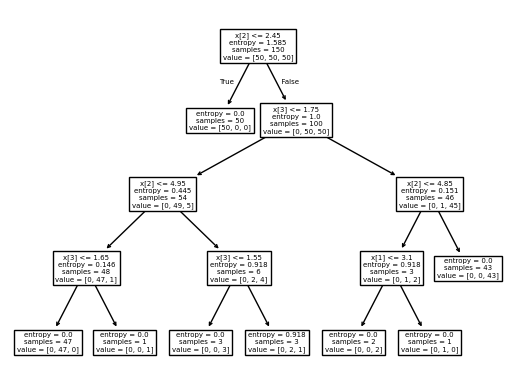

In [48]:
plot_tree(clf_tree)
plt.show()

In [49]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [66]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

In [60]:
california = fetch_california_housing()

X, y = pd.DataFrame(california.data, columns=california.feature_names)["AveBedrms"], california.target

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.to_numpy().reshape((-1, 1)))

In [63]:
X_scaled.shape

(20640, 1)

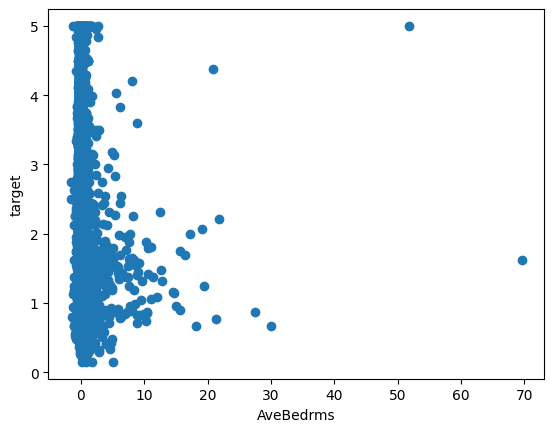

In [65]:
plt.scatter(X_scaled, y)
plt.xlabel('AveBedrms')
plt.ylabel('target')
plt.show()

7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X.reshape((-1,1)), y)

DecisionTreeRegressor(random_state=0)

8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

KeyboardInterrupt: 

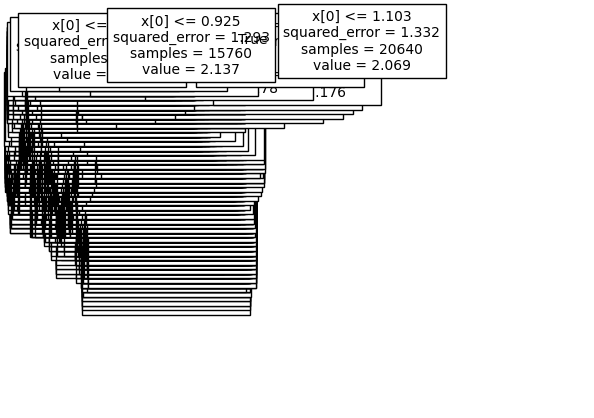

In [67]:
plot_tree(reg_tree)
plt.show()

In [68]:
X_synth = np.linspace(0, 1, 20).reshape((-1,1))
y_pred_reg = reg_tree.predict(X_synth)

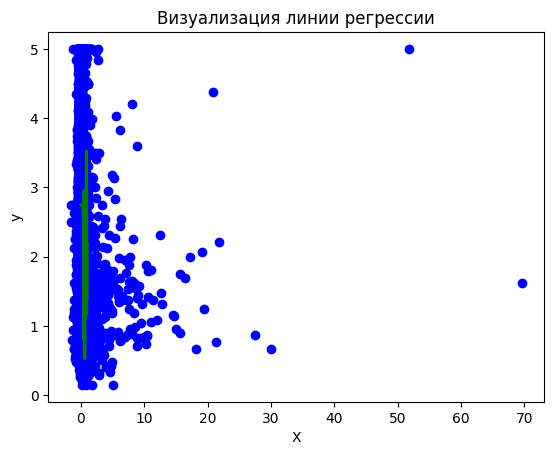

In [69]:
plt.scatter(X_scaled, y, c="b")

plt.plot(X_synth, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');